In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
import matplotlib.pyplot as plt

pio.templates.default = "plotly_dark"
pd.set_option("display.max_columns", None)

In [2]:
# Construct the absolute path to the files
files = [
    "WB - example - 01082023 - 31082023.xlsx",
    "WB - example - 01092023 - 30092023.xlsx",
    "WB - example - 01102023 - 30102023.xlsx",
]

In [3]:
def load_files(files, df: pd.DataFrame = None) -> pd.DataFrame:
    # Get the absolute path of the directory containing the script
    script_directory = Path().cwd().resolve().parent / "data"
    for file in files:
        # Construct the absolute path to the files
        file_path = script_directory / file
        # Read the XLSX file using pandas
        temp = pd.read_excel(file_path)
        # Melt df's date and type
        temp = temp.melt(id_vars=temp.columns[:52], var_name="date", value_name="value")
        # Split out column into date and type
        temp[["Дата", "metric"]] = temp["date"].str.split().apply(pd.Series)
        # Set correct type
        temp["Дата"] = pd.to_datetime(temp["Дата"], dayfirst=True)
        # Drop unneeded
        temp.dropna(axis="columns", how="all", inplace=True)
        temp.drop(columns="date", inplace=True)
        # Concatenate it all together
        if df is not None:
            df = pd.concat([df, temp])
        else:
            df = temp
    # df.rename(
    #     columns={"Коммент.": "Коммент", "Медиан. цена": "Медиан цена"}, inplace=True
    # )
    df["metric"] = df["metric"] + "/день"
    df = df.pivot(
        index=list(df.columns[:51]) + [df.columns[52]], columns="metric", values="value"
    ).reset_index()
    df.columns.name = None
    df.sort_values(by=["Дата", "Позиция в поиске"], inplace=True)
    df.reset_index(inplace=True, drop=True)
    df.to_csv(script_directory / "joined.csv", index=False)
    return df


df = load_files(files)
df.head()

Позиция в поиске        SKU  \
0                 1   86948840   
1                 2  169133160   
2                 3  168554155   
3                 4  165113013   
4                 5   91647074   

                                            Название  \
0              Пылесос для мебели от шерсти и клещей   
1  Ручной пылесос для удаления пылевого клеща с м...   
2            Пылесос от клещей и шерсти Xiaomi MIJIA   
3  Ручной пылесос для мебели от шерсти и клещей X...   
4            Пылесос для мебели от пылевого клеща УФ   

                                           Категория         Бренд  \
0  Бытовая техника/Техника для дома/Пылесосы и па...  Xiaomi Mijia   
1  Бытовая техника/Техника для дома/Пылесосы и па...        Xiaomi   
2  Бытовая техника/Техника для дома/Пылесосы и па...        Xiaomi   
3  Бытовая техника/Техника для дома/Пылесосы и па...        Xiaomi   
4                                                NaN       ZeFresh   

          Продавец                                               Цвет  \
0   ИП Вольнов Д А                                                NaN   
1   ИП Казнаев Д Г                                                NaN   
2  ИП Степанян М С                                              белый   
3    ИП Пазина С Ю  белый, теплый белый, мягкий белый, белый гляне...   
4    ИП Бутаев Н Г                                             черный   

   Наличие  Наличие на FBS  Коммент.  Цена  Макс. цена  Мин. цена   Ср. цена  \
0      204             210       680  4715        4715       4140  4715.0000   
1        0               8         8  4600        4600       4200  4400.0000   
2      221               0        55  4480        4830       4060  4138.0328   
3        0              16        16  4565        5005       4565     0.0000   
4        0               0        16  7400        7400       7400     0.0000   

  Медиан. цена  Продаж  Выручка  Потенциал  Средняя выручка  \
0         4255      40   188600   584660.0        6083.8710   
1         4400       1     4400   136400.0         141.9355   
2         4200     183   757260   757260.0       24427.7419   
3         4950       0        0        0.0           0.0000   
4         7400       0        0        0.0           0.0000   

   Упущенная выручка  Упущенная выручка %  \
0           396060.0              67.7419   
1           132000.0              96.7742   
2                0.0               0.0000   
3                0.0               0.0000   
4                0.0               0.0000   

                                              Ссылка  \
0  https://www.wildberries.ru/catalog/86948840/de...   
1  https://www.wildberries.ru/catalog/169133160/d...   
2  https://www.wildberries.ru/catalog/168554155/d...   
3  https://www.wildberries.ru/catalog/165113013/d...   
4  https://www.wildberries.ru/catalog/91647074/de...   

                                                Фото  Был в наличии  \
0  https://basket-05.wb.ru/vol869/part86948/86948...             10   
1  https://basket-12.wb.ru/vol1691/part169133/169...              1   
2  https://basket-12.wb.ru/vol1685/part168554/168...             31   
3  https://basket-11.wb.ru/vol1651/part165113/165...              0   
4  https://basket-05.wb.ru/vol916/part91647/91647...              0   

   Дней с продажами  Среднее при наличии  Рейтинг  Скидка  Цена со скидкой  \
0                 5               4.0000        5      59             4715   
1                 1               0.0000        5      30             4600   
2                24               5.9032        5      36             4480   
3                 0               0.0000        5      17             4565   
4                 0               0.0000        4      60             7400   

   Промокод  Базовая цена  СПП  Цена СПП  FBS  Subject ID  Позиция в рубрике  \
0         0         11500   14      4054    1         710                400   
1         0          6572   14      3956    1         710               1959 

Большая часть имеющихся столбцов попросту высчитываются из других. Например, наличие и цена = последнее значение Остатки/день, Цена/день в месяце, Макс., Мин., Ср., Медиан. * = соответствующее значение */день за месяц. Рейтинг = округленный дробный рейтинг, Цена со скидкой = Цена = Базовая цена - Скидка, Цена СПП = Цена - СПП, т.д. Ввиду ограничения по времени, рассматривать в основном буду только основные метрики (выручка, кол-во продаж, цена, запросы, остатки наличия).

In [4]:
# Just verifying smth
df.groupby([df["Дата"].dt.to_period("M"), "SKU"])["Выручка/день"].sum()["2023-08"][
    86948840
]

188600

Ознакомление с распределением данных

In [5]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df.describe()

Позиция в поиске          SKU  Наличие  Наличие на FBS  Коммент.  \
count           7909.00      7909.00  7909.00         7909.00   7909.00   
mean              47.57 116434342.83   364.40          207.36   1489.72   
min                1.00   3610609.00     0.00            0.00      0.00   
25%               24.00  68879102.00     1.00            0.00     14.00   
50%               46.00 143643363.00    52.00            0.00     92.00   
75%               70.00 169133160.00   289.00           14.00    332.00   
max               99.00 185290243.00  8625.00         9000.00  23751.00   
std               28.32  62014379.57   984.30          880.55   4099.12   

           Цена  Макс. цена  Мин. цена  Ср. цена  Продаж     Выручка  \
count   7909.00     7909.00    7909.00   7909.00 7909.00     7909.00   
mean    9480.59    10348.21    8888.65   7592.06  355.75  1371434.47   
min      839.00      929.00     809.00      0.00    0.00        0.00   
25%     3393.00     3585.00    3276.00   2459.19    3.00    28495.00   
50%     6838.00     7332.00    6465.00   4812.04   30.00   264055.00   
75%    12723.00    14250.00   11989.00  10074.00  205.00  1368523.00   
max   114990.00   114990.00  114990.00  41909.33 5296.00 20223425.00   
std    10284.13    10948.42    9894.42   7644.33  860.55  2836031.25   

        Потенциал  Средняя выручка  Упущенная выручка  Упущенная выручка %  \
count     7909.00          7909.00            7909.00              7909.00   
mean   1451138.28         45346.79           79920.72                13.15   
min          0.00             0.00               0.00                 0.00   
25%      76960.00           949.83               0.00                 0.00   
50%     298500.00          8677.16               0.00                 0.00   
75%    1416600.00         45365.17           11400.00                 6.67   
max   20223425.00        674114.17         1574893.00                96.77   
std    2869962.23         93935.24          212314.90                27.17   

       Был в наличии  Дней с продажами  Среднее при наличии  Рейтинг  Скидка  \
count        7909.00           7909.00              7909.00  7909.00 7909.00   
mean           21.73             15.41                12.05     4.39   34.98   
min             0.00              0.00                 0.00     0.00    0.00   
25%            13.00              2.00                 0.14     5.00   20.00   
50%            30.00             16.00                 1.10     5.00   35.00   
75%            30.00             29.00                 6.87     5.00   50.00   
max            31.00             31.00               176.53     5.00   88.00   
std            12.06             11.87                28.68     1.40   21.16   

       Цена со скидкой  Промокод  Базовая цена     СПП  Цена СПП     FBS  \
count          7909.00   7909.00       7909.00 7909.00   7909.00 7909.00   
mean           9480.59      0.00      14456.55   15.82   8004.50    0.50   
min             839.00      0.00       1390.00    0.00    688.00    0.00   
25%            3393.00      0.00       5253.00   15.00   2949.00    0.00   
50%            6838.00      0.00      10900.00   15.00   5641.00    0.00   
75%           12723.00      0.00      18990.00   18.00  10942.00    1.00   
max          114990.00      0.00     114990.00   27.00  97741.00    1.00   
std           10284.13      0.00      12278.38    3.64   8771.08    0.50   

       Subject ID  Позиция в рубрике  Количество категорий  Ср. продаж в день  \
count     7909.00            7909.00               7909.00            7909.00   
mean       764.82             571.41                  2.61              11.75   
min        710.00              -1.00                  0.00               0.00   
25%        710.00              36.00                  2.00               0.10   
50%        710.00             164.00                  3.00               0.97   
75%        710.00             711.00                  3.00               6.83   
max   

Количество уникальных Название больше, чем SKU, Позиция в поиске и Ссылка, что требует дополнительного исследования. 3d фото, Промокода нет ни у одного продукта. Subject ID непонятно какую значимость имеет (принимает всего 2 значения). FBS просто boolean выведенный из Наличие на FBS. Пылесосы продаются всего 4х стран. Категория, Предмет, СПП имеют достаточно низкую мощность множества для исследования на глаз.

In [6]:
df.nunique()

Позиция в поиске                         96
SKU                                      96
Название                                 98
Категория                                 4
Бренд                                    47
Продавец                                 61
Цвет                                     42
Наличие                                 156
Наличие на FBS                           67
Коммент.                                145
Цена                                    207
Макс. цена                              189
Мин. цена                               194
Ср. цена                                208
Медиан. цена                            198
Продаж                                  143
Выручка                                 219
Потенциал                               218
Средняя выручка                         219
Упущенная выручка                        78
Упущенная выручка %                      43
Ссылка                                   96
Фото                            

Несовпадение количества уникальных значений названия и Stock Keeping Unit, который должен быть уникальным для всех товаров, объясняется наличием товаров с одинаковыми названиями, а также...

In [7]:
temp = df.groupby("Название")["SKU"].nunique()
df.loc[df["Название"].isin(temp[temp > 1].index), ["Название", "SKU"]].sort_values(
    by="Название"
).drop_duplicates().head(10)

Название        SKU
5770  Пылесос беспроводной ручной для дома  175816873
7417  Пылесос беспроводной ручной для дома  158916877
6230                  Пылесос вертикальный  180098352
5941                  Пылесос вертикальный  180095197
2233           Пылесос вертикальный DX115C   68879102
6387           Пылесос вертикальный DX115C  176388046
3164            Пылесос вертикальный DX118  116432608
3154            Пылесос вертикальный DX118  176389651
4225    Пылесос вертикальный Deerma DX118C   34939243
6547    Пылесос вертикальный Deerma DX118C  185290243

...объясняется тем, что некоторые товары были переименованы на сайте (сохраняя SKU, ссылку).

In [8]:
with pd.option_context("display.max_colwidth", None):
    temp = df.groupby("SKU")["Название"].nunique()
    display(
        df.loc[df["SKU"].isin(temp[temp > 1].index), ["SKU", "Название", "Ссылка"]]
        .sort_values(by="SKU")
        .drop_duplicates()
        .head(10)
    )

SKU  \
4548   43007042   
2401   43007042   
735    77056838   
5825   77056838   
5889   77060174   
3133   77060174   
6834   77142687   
145    77142687   
281   122172532   
6904  122172532   

                                                                                                 Название  \
4548                                                               Пылесос для дома строительный, бытовой   
2401  Пылесос для дома ручной: строительный, бытовой (для автомобиля и мебели), мощный, с мешком для пыли   
735                                                                         Хозяйственный пылесос  WD 3 S   
5825                                               Профессиональный мощный пылесос для дома Керхер WD 3 S   
5889                                                     Профессиональный пылесос для дома Керхер WD 3 PS   
3133                                                                           Пылесос WD 3 P S V-17/4/20   
6834                                            Профессиональный мощный пылесос для дома Керхер WD 2 Plus   
145                                                                   Профессиональный пылесос  WD 2 Plus   
281                                                                    Беспроводной автомобильный пылесос   
6904                                                                      Автопылесос беспроводной мощный   

                                                        Ссылка  
4548   https://www.wildberries.ru/catalog/43007042/detail.aspx  
2401   https://www.wildberries.ru/catalog/43007042/detail.aspx  
735    https://www.wildberries.ru/catalog/77056838/detail.aspx  
5825   https://www.wildberries.ru/catalog/77056838/detail.aspx  
5889   https://www.wildberries.ru/catalog/77060174/detail.aspx  
3133   https://www.wildberries.ru/catalog/77060174/detail.aspx  
6834   https://www.wildberries.ru/catalog/77142687/detail.aspx  
145    https://www.wildberries.ru/catalog/77142687/detail.aspx  
281   https://www.wildberries.ru/catalog/122172532/detail.aspx  
6904  https://www.wildberries.ru/catalog/122172532/detail.aspx

Около 95% пылесосов принадлежат категории "Бытовая техника/Техника для дома/Пылесосы и пароочистители/Пылесос".

In [9]:
df["Категория"].value_counts(normalize=True)

Категория
Бытовая техника/Техника для дома/Пылесосы и пароочистители/Пылесос                                                 0.95
Автотовары/Аксессуары в салон и багажник/Уход за автомобилем                                                       0.03
Акции/Всемирный день шопинга /Автотовары/Аксессуары в салон и багажник/Уход за автомобилем/Пылесос автомобильный   0.01
Бытовая техника/Техника для дома                                                                                   0.00
Name: proportion, dtype: float64

Почти все пылесосы попадают под предметную категорию бытовой техники, и малая доля (4%) относится к пылесосам для автомобилей.

In [10]:
df["Предмет"].value_counts(normalize=True)

Предмет
Бытовая техника / Пылесосы                      0.65
Бытовая техника / Пылесос                       0.31
Автомобильные товары / Пылесосы автомобильные   0.04
Name: proportion, dtype: float64

Большинство пылесосов имеют скидку постоянного покупателя в размере 18, 15 или 14%. СПП ниже 14 или выше 18 встречаются крайне редко.

In [11]:
df["СПП"].value_counts(normalize=True)

СПП
18   0.38
15   0.34
14   0.20
0    0.02
5    0.02
27   0.02
20   0.01
23   0.01
24   0.01
Name: proportion, dtype: float64

Интерактивная линейная диаграмма для выручки, количества продаж, цены, запросов и остатков наличия.

In [12]:
main_data = [
    "Выручка/день",
    "Продажи/день",
    "Цена/день",
    "Запросы/день",
    "Остатки/день",
]
px.line(
    df.groupby("Дата", as_index=False)[main_data].mean(),
    x="Дата",
    y=main_data,
    labels={"value": ""},
)

Лучшие продавцы по количеству продаж (сгруппированы по месяцам, упорядочены по общему количеству). ООО Айковер ПРО, Number one, Оооплат лидируют по количеству продаж.

In [13]:
# Group by seller and month
prep = df.groupby(["Продавец", pd.Grouper(key="Дата", freq="M")], as_index=False)[
    "Продажи/день"
].sum()
# Pivot months to columns
prep = prep.pivot(index="Продавец", columns="Дата", values="Продажи/день")
# Set month names
months = ["Aug.", "Sept.", "Oct."]
prep.columns = months
# Calculate totals and sort
prep["Total"] = prep.sum(axis=1)
prep.sort_values(by="Total", inplace=True)
prep.reset_index(inplace=True)
# Plot
fig = px.bar(
    prep[prep.Total!=0],
    x=months,
    y="Продавец",
    orientation="h",
    width=1500,
    height=1000,
    labels={"value": "Продаж"},
    title="Лидеры по продажам",
)
fig.update_layout(legend_title="Months")
fig

Общая доля стран производителей. Китай 💪

In [14]:
prep = df.groupby("Страна", as_index=False, dropna=False)["Продажи/день"].sum()
prep.sort_values(by="Продажи/день", ascending=False, inplace=True)
display(prep)
data = [
    go.Pie(
        values=prep["Продажи/день"],
        labels=prep["Страна"],
        hole=0.3,
        direction="clockwise",
        sort=True,
    )
]
fig = go.Figure(data, layout={"title": "Доля стран производителей"})
fig.update_layout(
    width=700,
    height=500
)
fig

Страна  Продажи/день
0             Китай         84088
4               NaN          4619
3            Турция          3468
2           Румыния           769
1  Республика Корея             1

Топ продавцы и их товары. ООО Айковер ПРО, Number one, Оооплат лидируют по количеству продаж.

In [15]:
# Group by seller and SKU
prep = df.groupby(["Продавец", "SKU"], as_index=False)["Продажи/день"].sum()
# Add total by seller
prep["total"] = prep.groupby("Продавец")["Продажи/день"].transform("sum")
# Sort for unique
prep.sort_values(by="total", ascending=False, inplace=True)
prep.rename(columns={"Продажи/день": "Продаж"}, inplace=True)
# Add item names
prep = prep.join(
    df[["SKU", "Название"]].drop_duplicates(subset="SKU", keep="last").set_index("SKU"),
    on="SKU",
    how="left"
)
# display(prep[prep['total'].isin(prep["total"].unique()[:10])])
fig = px.sunburst(
    prep[prep["total"].isin(prep["total"].unique()[:10])],
    path=["Продавец", "SKU"],
    values="Продаж",
    title="Топ 10 продавцов и их пылесосы",
    hover_name="Название",
    width=800,
    height=800,
)
fig.update_traces(textinfo="label+value", insidetextorientation="horizontal")
fig

Сумма продаж по товарам (по месяцам). Пылесос вертикальный Deerma DX700 доминирует.

In [16]:
# Group by month and sku
prep = df.groupby(["SKU", pd.Grouper(key="Дата", freq="M")], as_index=False)[
    "Продажи/день"
].sum()
# Pivot months to columns
prep = prep.pivot(index="SKU", columns="Дата", values="Продажи/день")
# Set month names
months = ["Aug.", "Sept.", "Oct."]
prep.columns = months
# Calculate totals and sort
prep["Total"] = prep.sum(axis=1)
prep.sort_values(by="Total", ascending=False, inplace=True)
prep.reset_index(inplace=True)
# Add item names
prep = prep.join(
    df[["SKU", "Название"]].drop_duplicates(subset="SKU", keep="last").set_index("SKU"),
    on="SKU",
    how="left"
)
# To string for plotting
prep["SKU"] = prep.SKU.astype(str)
# Plot
fig = px.bar(
    prep[prep.Total!=0],
    x=prep.loc[prep.Total!=0, "SKU"],
    y=months,
    labels={"value": "Продаж", "x": "SKU"},
    title="Сумма продаж по товарам",
    barmode="stack",
    width=1500,
    height=800,
)
fig.update_layout(legend_title="Months")
fig

In [17]:
# Reorder columns
prep[[prep.columns[-1]]+list(prep.columns[:-1])]

Название        SKU    Aug.  \
0                   Пылесос вертикальный Deerma DX700   36374567 4280.00   
1         Пылесос вертикальный DX700 пылесос для дома  169923311 1349.00   
2                       Пылесос вертикальный для дома  123057289  382.00   
3   Пылесос вертикальный ручной для дома и автомоб...  146708735 4580.00   
4                  Пылесос вертикальный Deerma DX118C   34939243 2134.00   
..                                                ...        ...     ...   
91      Пылесос для дома с контейнером мощный 2300 вт  182565822     NaN   
92      Пылесос сухой уборки VC 3 Premium 1.198-135.0  145200814    0.00   
93                  Ручной вертикальный пылесос LX650  183752263     NaN   
94                 Пылесос вертикальный Deerma DX115C  185289591     NaN   
95                 Пылесос вертикальный Deerma DX118C  185290243     NaN   

     Sept.    Oct.    Total  
0  3710.00 2964.00 10954.00  
1  3692.00 4927.00  9968.00  
2  3323.00 5296.00  9001.00  
3  3119.00 1037.00  8736.00  
4  2548.00 2181.00  6863.00  
..     ...     ...      ...  
91     NaN    0.00     0.00  
92    0.00    0.00     0.00  
93     NaN    0.00     0.00  
94     NaN    0.00     0.00  
95     NaN    0.00     0.00  

[96 rows x 6 columns]

Средняя выручка по брендам и месяцам. Лидируют Enchen, STIMAXON и Xiaomi.

In [18]:
# Group by brand and month
prep = df.groupby(["Бренд", pd.Grouper(key="Дата", freq="M")], as_index=False)[
    "Выручка/день"
].mean()
# Pivot months to columns
prep = prep.pivot(index="Бренд", columns="Дата", values="Выручка/день")
# Rename months
months = ["Aug.", "Sept.", "Oct."]
prep.columns = months
# Calculate and sort by total
prep["Total"] = prep.mean(axis=1)
prep.sort_values(by="Total", ascending=False, inplace=True)
prep.reset_index(inplace=True)
# Plot
fig = px.bar(
    prep[prep.Total != 0],
    x="Бренд",
    y=months,
    width=1500,
    height=800,
    labels={"value": "Выручка", "x": "SKU"},
    title="Ср. выручка по брендам и месяцам",
    barmode="overlay",
)
fig.update_layout(legend_title="Months")
fig

Наибольшая корреляция наблюдается между рейтингом и дробным рейтингом (рейтинг - просто округленный дробный), а также рейтингом карточки. Корреляция выше 0.5 между рейтингом карточки и количеством фото/присутствие видео указывает на наличие связи между переменными. Можно выдвинуть гипотезу, что наличие видео и большое количество фото положительно влияет на рейтинг карточки, хотя корреляция указывает лишь на наличие линейной зависимости, а не причинно-следственной связей. Вероятнее, что количество продаж положительно влияет на количество комментариев, чем наоборот. Наибольшая отрицательная связь наблюдается между рейтингом(/карточки) и позицией в поиске, что объясняется обратной оценкой позиции в поиске (ниже число - выше (лучше) позиция). СПП не имеет сильной линейной зависимости ни с какими другими рассмотренными переменными.

In [19]:
corr = df[
    [
        "Кол-во фотографий",
        "Есть видео",
        "Коммент.",
        "Позиция в поиске",
        "Позиция в рубрике",
        "Рейтинг",
        "Дробный рейтинг",
        "Рейтинг карточки",
        "Скидка",
        "СПП",
        "Цена",
        "Продаж",
    ]
].corr().round(2)
px.imshow(corr, color_continuous_scale='RdBu_r', zmin=-1, zmax=1, text_auto=True, width=1000, height=1000, title="Матрица корреляции")

Рассчитал коэффициент удовлетворения запросов, который показывает возможность удовлетворения запросов при имеющихся в наличии остатков. >=1 - полное удовлетворение запросов (с лишним остатком), <1 - неполное удовлетворение всех запросов.

In [20]:
# Calculate availability
df["Коэффициент удовлетворения запросов"] = df["Остатки/день"]/df["Запросы/день"]
# Replace infinity with 1 (full availability)
df = df.replace(np.inf, 1)

# Group by month and sku
prep = df.groupby(["SKU", pd.Grouper(key="Дата", freq="M")], as_index=False)[
    "Коэффициент удовлетворения запросов"
].mean()
# Pivot months to columns
prep = prep.pivot(index="SKU", columns="Дата", values="Коэффициент удовлетворения запросов")
# Set month names
months = ["Aug.", "Sept.", "Oct."]
prep.columns = months
# Calculate totals and sort
prep["Total"] = prep.mean(axis=1)
prep.sort_values(by="Total", ascending=False, inplace=True)
prep.reset_index(inplace=True)
# Add item names
prep = prep.join(
    df[["SKU", "Название"]].drop_duplicates(subset="SKU", keep="last").set_index("SKU"),
    on="SKU",
    how="left",
)
# To string for plotting
prep["SKU"] = prep.SKU.astype(str)

# Plot
fig = px.bar(
    prep[prep.Total != 0],
    x=prep.loc[prep.Total != 0, "SKU"],
    y=months,
    labels={"value": "Коэффициент удовлетворения запросов", "x": "SKU"},
    title="Коэффициент удовлетворения запросов по товарам",
    barmode="stack",
    width=1500,
    height=800,
)
fig.update_layout(legend_title="Months")
fig

Просматривая результаты теста Дики-Фуллера (ADF), диаграммы автокорреляции и сезонной декомпозиции, можно прийти к выводу, что истинная сезонность не наблюдается. Результаты варьируются в зависимости от месяца, что можно объяснить тем, что алгоритм накладывает искусственную сезонность, подстраиваясь под шум в данных, интерпретируя случайные колебания как закономерности. Вероятно, это связано с короткими временными рядами и небольшим размером выборки, что приводит к сезонности там, где ее нет.

Выручка/день
ADF p-value: 0.18238467766995775


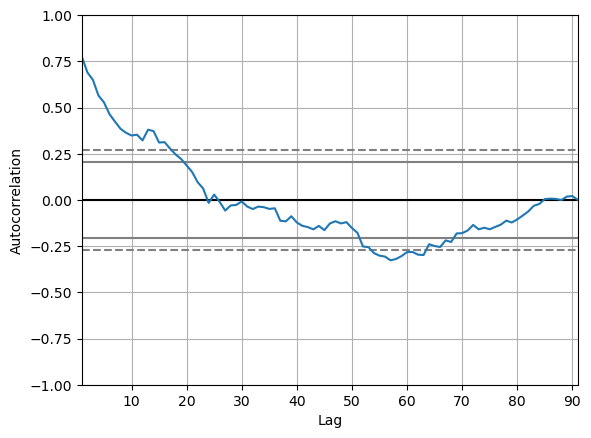

Продажи/день
ADF p-value: 0.0011718799972388588


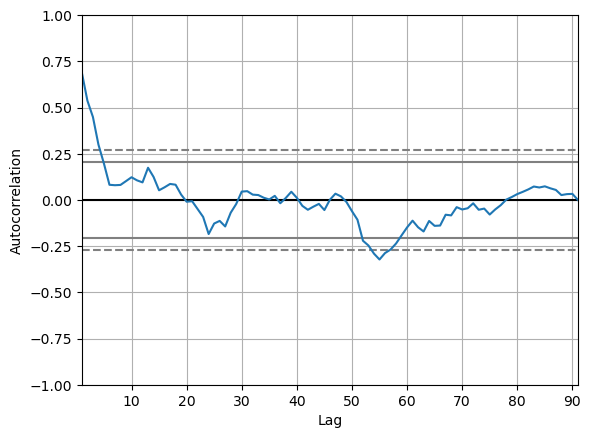

Цена/день
ADF p-value: 0.5520717715668593


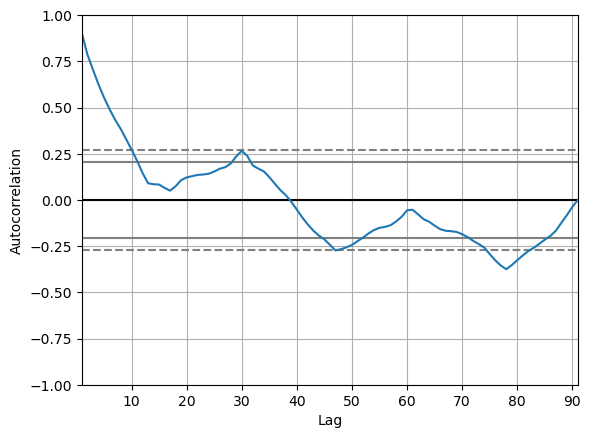

Запросы/день
ADF p-value: 0.9019774005118335


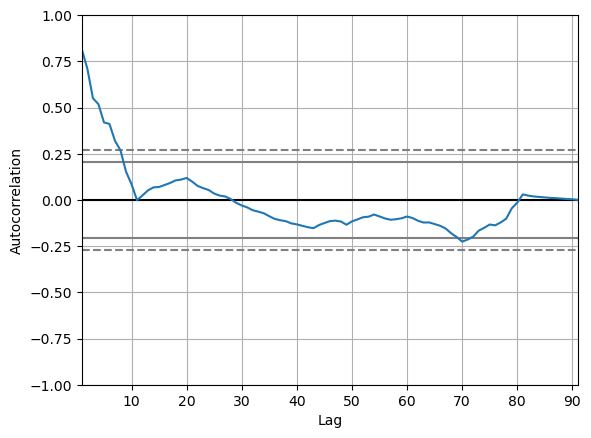

Остатки/день
ADF p-value: 0.9984731052199168


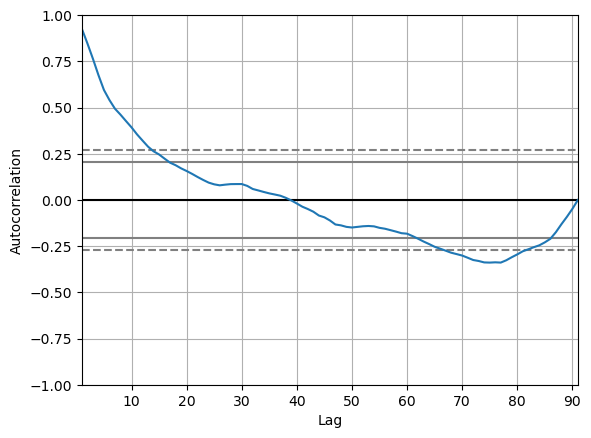

In [21]:
for metric in main_data:
    print(metric)
    series = df.groupby("Дата", as_index=False)[metric].mean().set_index("Дата")
    res = sm.tsa.stattools.adfuller(series)
    print(f"ADF p-value: {res[1]}")
    pd.plotting.autocorrelation_plot(series)
    plt.show()

Выручка/день
ADF p-value: 2.933106169884518e-15


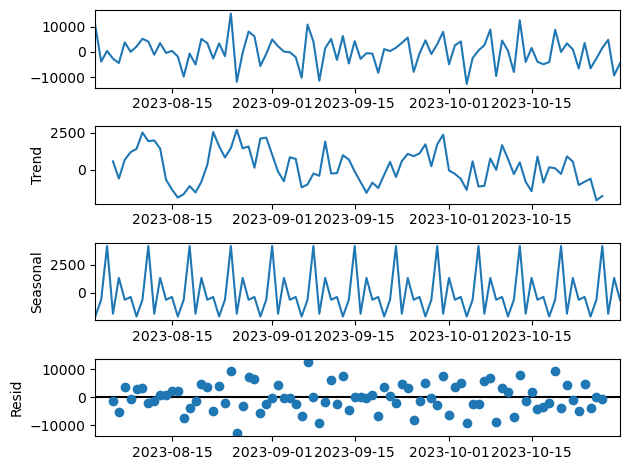

Продажи/день
ADF p-value: 1.0341903133055373e-13


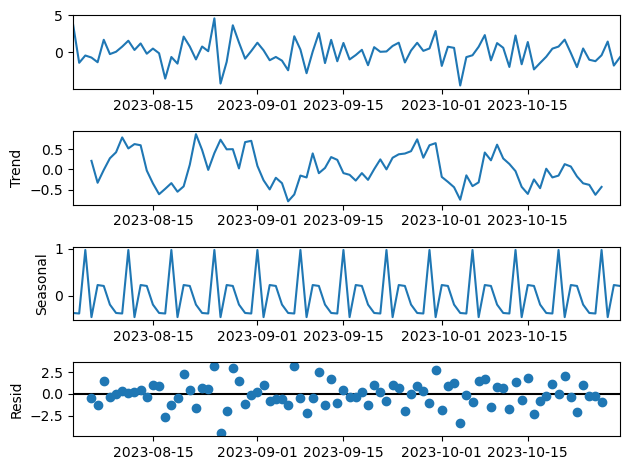

Цена/день
ADF p-value: 6.49299164161257e-13


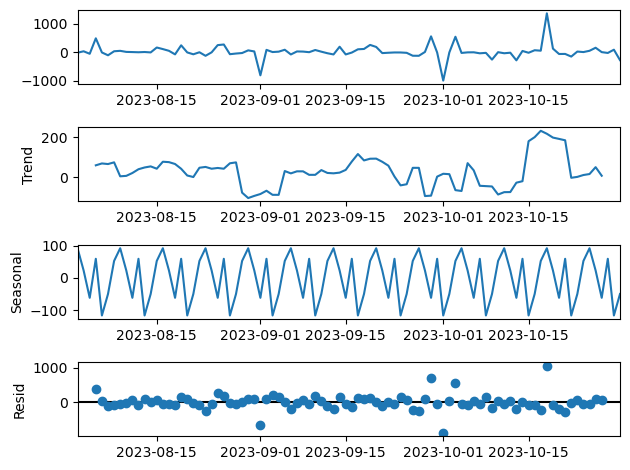

Запросы/день
ADF p-value: 0.003907185289213453


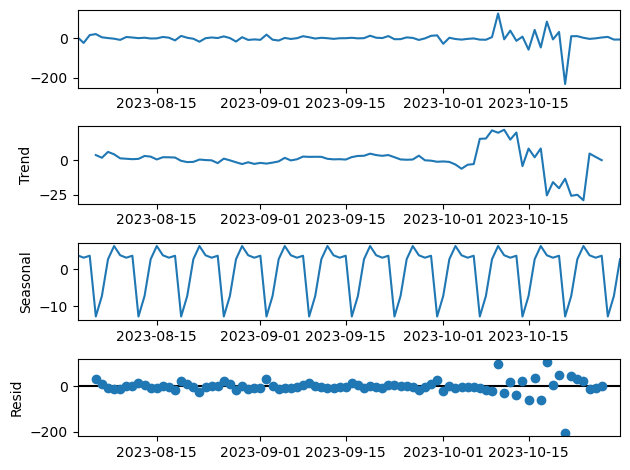

Остатки/день
ADF p-value: 5.152445206163948e-12


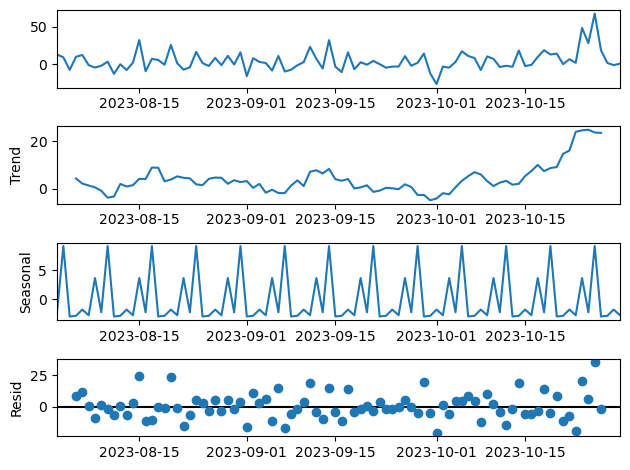

In [22]:
for metric in main_data:
    print(metric)
    series = df.groupby("Дата", as_index=False)[metric].mean().set_index("Дата").diff().iloc[1:]
    result = sm.tsa.seasonal_decompose(series)
    result.plot()
    res = sm.tsa.stattools.adfuller(series)
    print(f"ADF p-value: {res[1]}")
    plt.show()

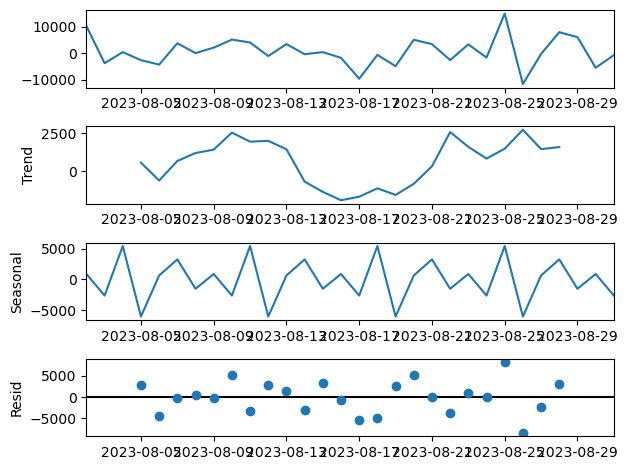

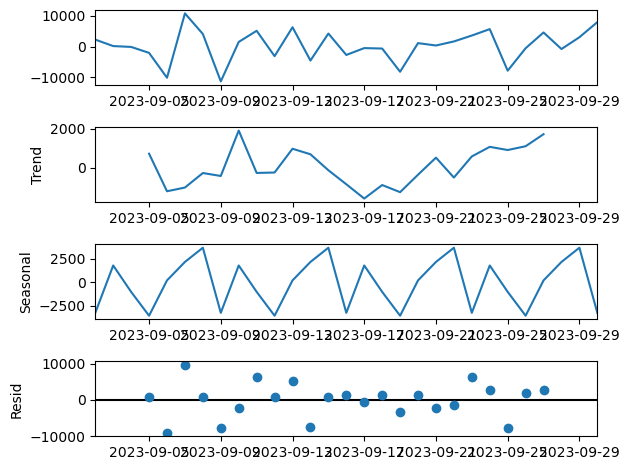

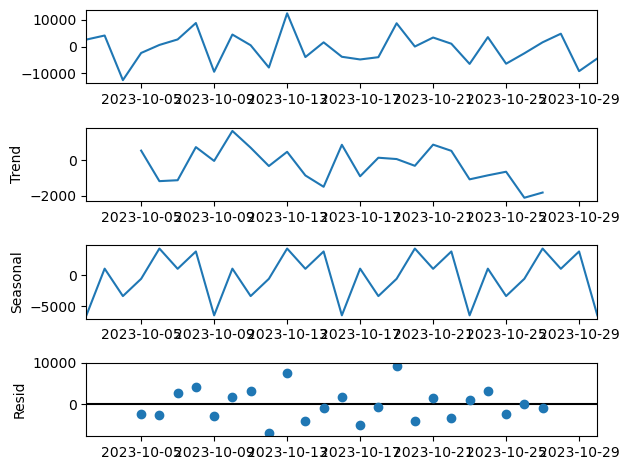

In [23]:
series = df.groupby("Дата", as_index=False)["Выручка/день"].mean().set_index("Дата")

for month in [8, 9, 10]:
    s = series[series.index.month==month]
    result = sm.tsa.seasonal_decompose(s.diff().iloc[1:])
    result.plot()
    plt.show()